# Задача 3. Минимизация негладкой функции

1. Теперь рассмотрим функцию h(x) = int(f(x)) на том же отрезке [1, 30], т.е. теперь каждое значение f(x) приводится к типу int и функция принимает только целые значения.
1. Такая функция будет негладкой и даже разрывной, а ее график будет иметь ступенчатый вид. Убедитесь в этом, построив график h(x) с помощью matplotlib.
1. Попробуйте найти минимум функции h(x) с помощью BFGS, взяв в качестве начального приближения x=30. Получившееся значение функции – ваш первый ответ в этой задаче.
1. Теперь попробуйте найти минимум h(x) на отрезке [1, 30] с помощью дифференциальной эволюции. Значение функции h(x) в точке минимума – это ваш второй ответ в этом задании. Запишите его через пробел после предыдущего.
1. Обратите внимание на то, что полученные ответы различаются. Это ожидаемый результат, ведь BFGS использует градиент (в одномерном случае – производную) и явно не пригоден для минимизации рассмотренной нами разрывной функции. Попробуйте понять, почему минимум, найденный BFGS, именно такой (возможно в этом вам поможет выбор разных начальных приближений).
1. Выполнив это задание, вы увидели на практике, чем поиск минимума функции отличается от глобальной оптимизации, и когда может быть полезно применить вместо градиентного метода оптимизации метод, не использующий градиент. Кроме того, вы попрактиковались в использовании библиотеки SciPy для решения оптимизационных задач, и теперь знаете, насколько это просто и удобно.

In [25]:
import numpy as np
import math
import matplotlib.pyplot as plt
from scipy.optimize import minimize, differential_evolution

In [26]:
def func(x):
    return math.sin(x / 5) * math.exp(x / 10) + 5 * math.exp(-x / 2)

In [27]:
def h(x):
    return int(func(x))

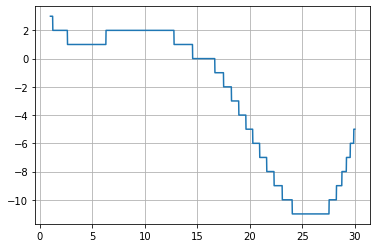

In [28]:
# Создадим область определения и нарисуем функцию
x_min = 1
x_max = 30
dx = 0.01

# Создадим список координат
x_list = np.arange(x_min, x_max, dx)
y_list = [h(x) for x in x_list]

# Нарисуем график
plt.plot(x_list, y_list)

# Покажем окно с нарисованным графиком
plt.grid(True)
plt.show()

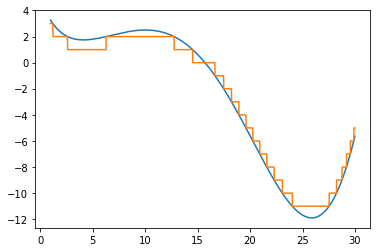

In [29]:
y = list(map(func, x_list))
y_int = list(map(h, x_list))
plt.plot(x_list, y)
plt.plot(x_list, y_int)

In [30]:
minimize(h, 30, method='BFGS')

      fun: -5
 hess_inv: array([[1]])
      jac: array([0.])
  message: 'Optimization terminated successfully.'
     nfev: 2
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([30.])

In [31]:
bounds = [(1, 30)]
differential_evolution(h, bounds)

     fun: -11.0
 message: 'Optimization terminated successfully.'
    nfev: 92
     nit: 5
 success: True
       x: array([26.44168958])

In [32]:
x0 = 30
result = minimize(h, x0, method='BFGS')
ans1 = round(result.fun, 2)
print("Answer1=", ans1)

Answer1= -5


In [33]:
min1_x0 = range(30)
min1_x_list = list()
min1_y_list = list()
for x0 in min1_x0:
    m = minimize(h, x0)
    print(m.x, m.fun, m.success, m.nfev, m.nit)
    if (m.x <= 30) & (m.success == True):
        min1_x_list.append(x0)
        min1_y_list.append(m.fun)

[5.12589894e-05] 4.0 True 22 1
[1.] 3 True 2 0
[2.] 2 True 2 0
[3.] 1 True 2 0
[4.] 1 True 2 0
[5.] 1 True 2 0
[6.] 1 True 2 0
[7.] 2 True 2 0
[8.] 2 True 2 0
[9.] 2 True 2 0
[10.] 2 True 2 0
[11.] 2 True 2 0
[12.] 2 True 2 0
[13.] 1 True 2 0
[14.] 1 True 2 0
[15.] 0 True 2 0
[16.] 0 True 2 0
[17.] -1 True 2 0
[18.] -2 True 2 0
[19.] -4 True 2 0
[20.] -5 True 2 0
[21.] -7 True 2 0
[22.] -8 True 2 0
[23.] -9 True 2 0
[24.] -10 True 2 0
[25.] -11 True 2 0
[26.] -11 True 2 0
[27.] -11 True 2 0
[28.] -10 True 2 0
[29.] -8 True 2 0


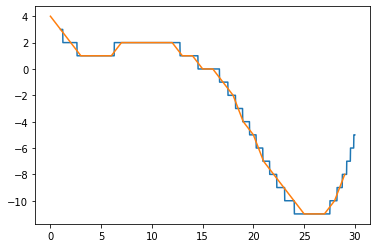

In [34]:
plt.plot(x_list, y_list, min1_x_list, min1_y_list)
plt.show()

In [35]:
bounds = [(1, 30)]
result = differential_evolution(h, bounds)
print(result.x, result.fun, result.nfev, result.nit)
ans2 = round(result.fun, 2)
print("Answer2=", ans2)

[24.21721843] -11.0 107 6
Answer2= -11.0


In [36]:
answer = '{} {}'.format(ans1, ans2)
with open('3.2hw3.txt', 'w') as f:
    f.write(answer)
answer


'-5 -11.0'